In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from  sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,confusion_matrix,accuracy_score,classification_report

import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('housing.csv.zip')

In [28]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [30]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


# missing Value

In [33]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

# duplicate value

In [34]:
df.duplicated().sum()

np.int64(0)

# Outlier Detection

<Axes: >

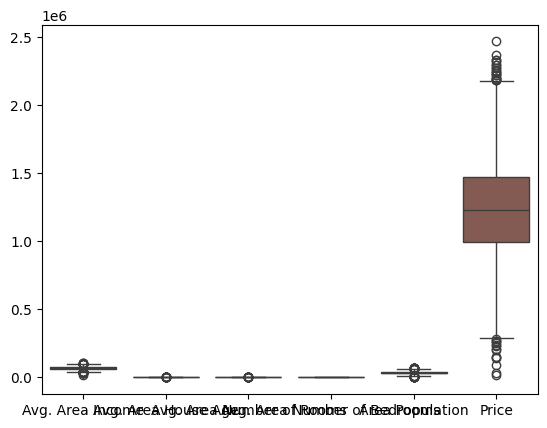

In [35]:
sns.boxplot(df)

In [36]:
for i in df.columns:
    if i =='Address':
        pass
    else:
        print(i)

Avg. Area Income
Avg. Area House Age
Avg. Area Number of Rooms
Avg. Area Number of Bedrooms
Area Population
Price


Avg. Area Income


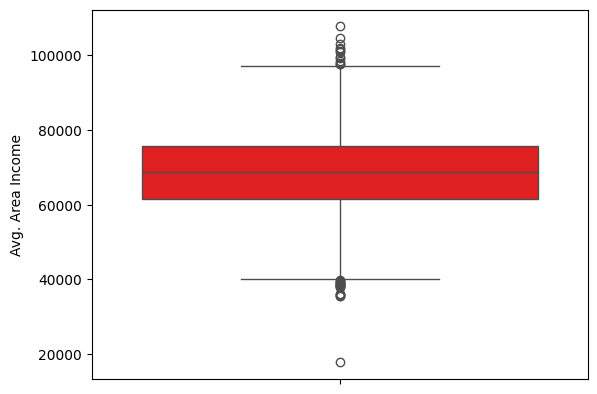

Avg. Area House Age


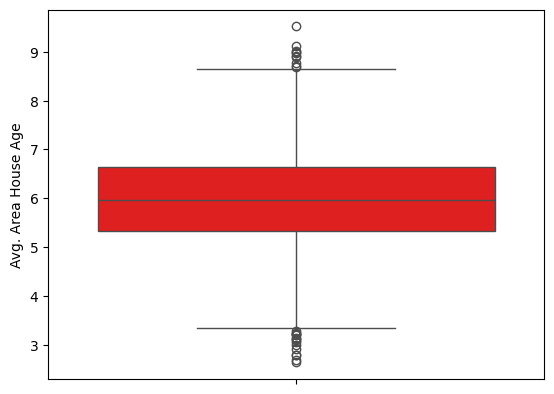

Avg. Area Number of Rooms


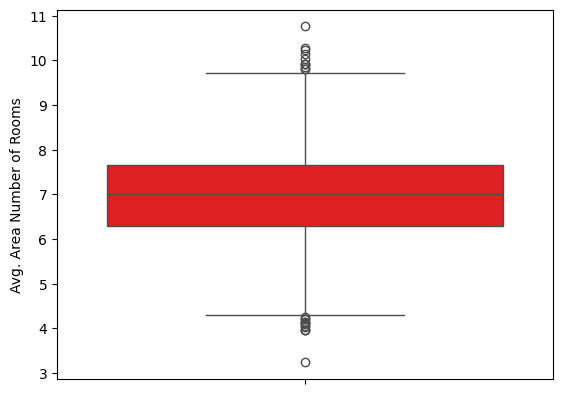

Avg. Area Number of Bedrooms


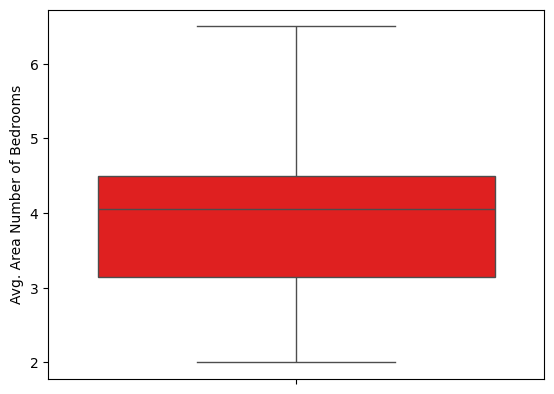

Area Population


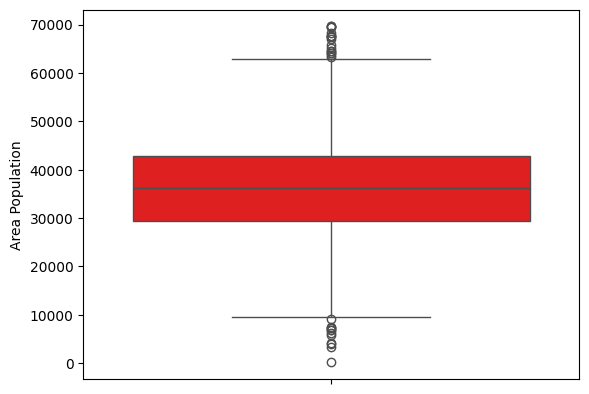

Price


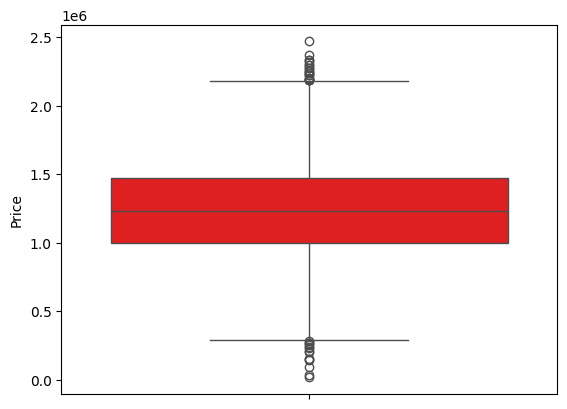

In [37]:
for i in df.columns:
    if i =='Address':
        pass
    else:
        print(i)
        sns.boxplot(df[i],color='r')
        plt.show()

# using IQR

In [41]:
numeric_df = df.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1


In [42]:
Q1

Avg. Area Income                 61480.562390
Avg. Area House Age                  5.322283
Avg. Area Number of Rooms            6.299250
Avg. Area Number of Bedrooms         3.140000
Area Population                  29403.928700
Price                           997577.135075
Name: 0.25, dtype: float64

In [43]:
Q3

Avg. Area Income                7.578334e+04
Avg. Area House Age             6.650808e+00
Avg. Area Number of Rooms       7.665871e+00
Avg. Area Number of Bedrooms    4.490000e+00
Area Population                 4.286129e+04
Price                           1.471210e+06
Name: 0.75, dtype: float64

In [44]:
IQR

Avg. Area Income                 14302.776275
Avg. Area House Age                  1.328525
Avg. Area Number of Rooms            1.366621
Avg. Area Number of Bedrooms         1.350000
Area Population                  13457.362070
Price                           473633.069425
dtype: float64

In [46]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound

Avg. Area Income                 40026.397978
Avg. Area House Age                  3.329495
Avg. Area Number of Rooms            4.249318
Avg. Area Number of Bedrooms         1.115000
Area Population                   9217.885595
Price                           287127.530937
dtype: float64

In [47]:
upper_bound

Avg. Area Income                9.723750e+04
Avg. Area House Age             8.643597e+00
Avg. Area Number of Rooms       9.715803e+00
Avg. Area Number of Bedrooms    6.515000e+00
Area Population                 6.304733e+04
Price                           2.181660e+06
dtype: float64

In [48]:
outliers = df[((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)]
without_outliers = df[~((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)]

In [51]:

outliers

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
12,39033.80924,7.671755,7.250029,3.10,39220.36147,1.042814e+06,"209 Natasha Stream Suite 961\nHuffmanland, NE ..."
28,90499.05745,6.384359,4.242191,3.04,33970.16499,1.240764e+06,"6531 Chase Prairie Apt. 245\nSusanshire, MN 22365"
39,17796.63119,4.949557,6.713905,2.50,47162.18364,3.023558e+05,"9932 Eric Circles\nLake Martha, WY 34611-6127"
90,48904.98327,4.844973,5.448956,3.38,32960.75307,2.018981e+05,"2124 Garcia Viaduct\nNorth Kellytown, DC 30864"
228,66574.70999,5.550265,6.844150,2.17,69575.44946,1.702406e+06,"551 Macdonald Viaduct\nWest Stephanie, TN 55360"
...,...,...,...,...,...,...,...
4803,61846.13590,5.057578,7.681141,3.39,69621.71338,1.504316e+06,"8500 Colin Shores Apt. 432\nNew Gilbert, FM 03165"
4844,37908.67586,6.233813,7.252916,6.07,39632.07979,8.804028e+05,"901 Peter Fort Apt. 157\nTaylorfort, ND 06249-..."
4855,35797.32312,5.544221,7.795138,5.00,24844.20019,2.998630e+05,"645 Mary Radial\nEast Roberto, CA 23652-5430"
4859,73685.40366,8.916093,6.291818,3.05,36000.50603,1.798927e+06,"7178 Michael Key Apt. 038\nMccallmouth, MS 378..."


In [52]:
without_outliers

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


In [57]:

numeric_df = df.select_dtypes(include=['number'])
                              
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outlier_index = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)


without_outliers = df[~outlier_index].copy()

print("Rows before:", df.shape[0])
print("Rows after removing outliers:", without_outliers.shape[0])



Rows before: 5000
Rows after removing outliers: 4865


Avg. Area Income


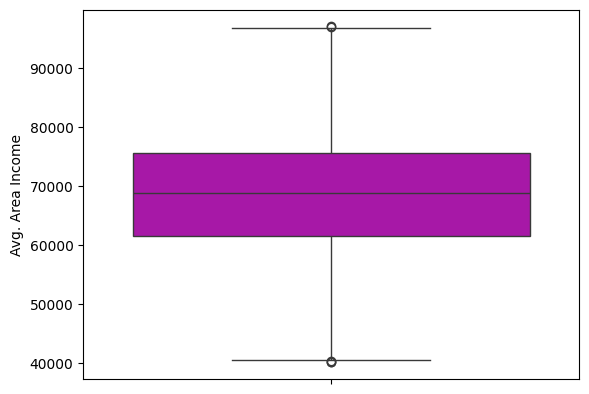

Avg. Area House Age


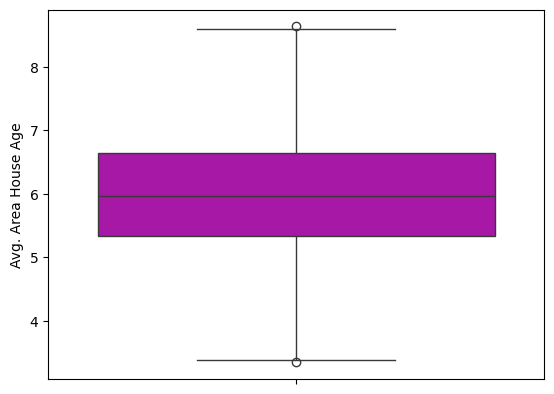

Avg. Area Number of Rooms


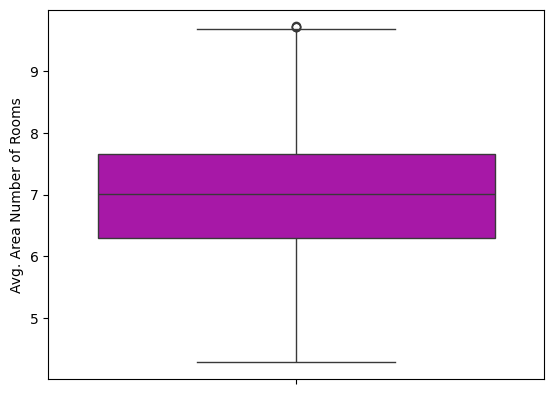

Avg. Area Number of Bedrooms


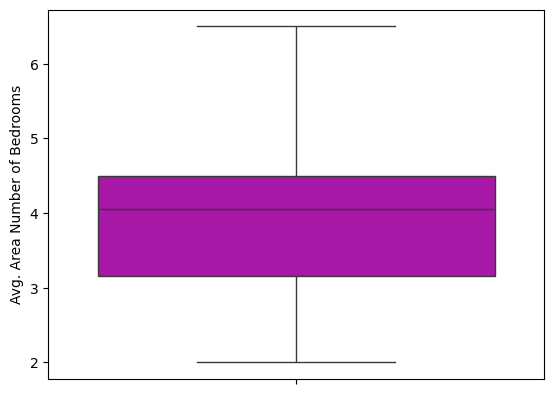

Area Population


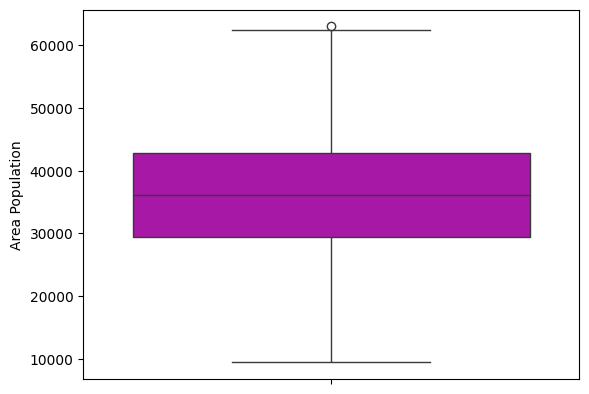

Price


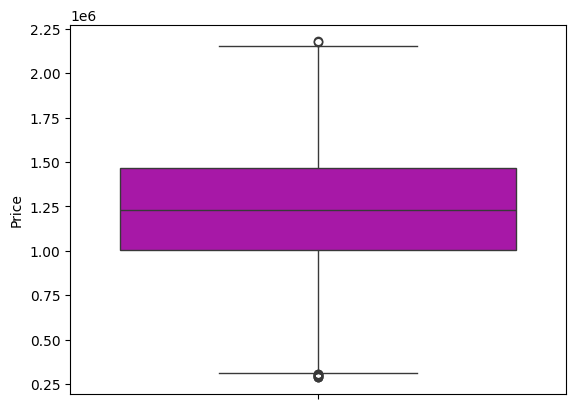

In [58]:
for i in without_outliers.columns:
    if i =='Address':
        pass
    else:
        print(i)
        sns.boxplot(without_outliers[i],color='m')
        plt.show()
    

In [60]:
without_outliers.shape

(4865, 7)

# feature encoding

In [66]:
df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [71]:

without_outliers['Address']


0       208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1       188 Johnson Views Suite 079\nLake Kathleen, CA...
2       9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3                               USS Barnett\nFPO AP 44820
4                              USNS Raymond\nFPO AE 09386
                              ...                        
4995                     USNS Williams\nFPO AP 30153-7653
4996                PSC 9258, Box 8489\nAPO AA 42991-3352
4997    4215 Tracy Garden Suite 076\nJoshualand, VA 01...
4998                            USS Wallace\nFPO AE 73316
4999    37778 George Ridges Apt. 509\nEast Holly, NV 2...
Name: Address, Length: 4865, dtype: object

In [72]:

without_outliers['Address'].value_counts()

Address
37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595             1
39174 Jessica Mission Apt. 539\nWest Cindyborough, WV 82109-6583    1
109 Lee Wall Apt. 315\nLunamouth, AZ 05121-3634                     1
1316 Tony Inlet Suite 235\nWest Jimmy, SC 72946                     1
0476 Jessica Shoals\nMelissamouth, DE 39609-2777                    1
                                                                   ..
06039 Jennifer Islands Apt. 443\nTracyport, KS 16077                1
USNS Raymond\nFPO AE 09386                                          1
USS Barnett\nFPO AP 44820                                           1
9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489                 1
188 Johnson Views Suite 079\nLake Kathleen, CA 48958                1
Name: count, Length: 4865, dtype: int64

In [73]:
del without_outliers['Address']

In [74]:
without_outliers.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


# multi colinearity

In [75]:
without_outliers.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [82]:
d = without_outliers.drop(columns=['Price'], axis=1)

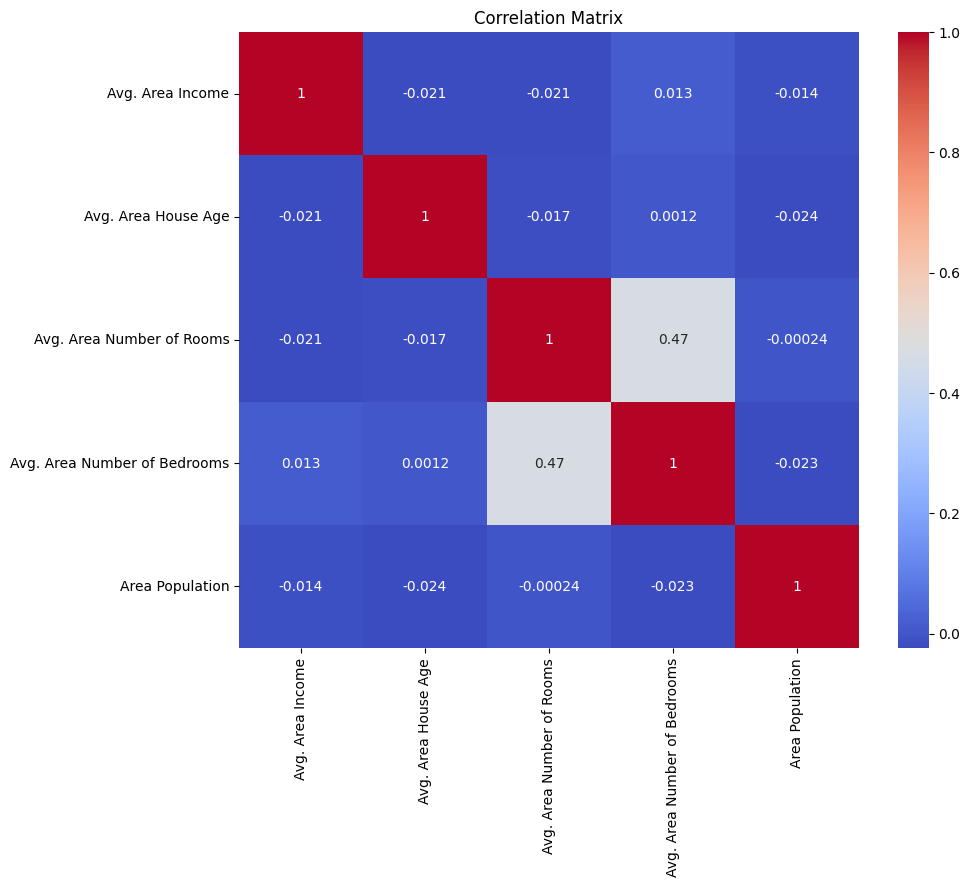

In [83]:

plt.figure(figsize=(10,8))
sns.heatmap(d.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# feature selection

In [84]:

without_outliers.corr()['Price']

Avg. Area Income                0.632031
Avg. Area House Age             0.441675
Avg. Area Number of Rooms       0.329630
Avg. Area Number of Bedrooms    0.168606
Area Population                 0.406027
Price                           1.000000
Name: Price, dtype: float64

# Model Building

In [85]:
without_outliers

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


# seperate independent and dependent

In [86]:
X = without_outliers.drop(columns=['Price'], axis=1)
Y = without_outliers['Price']

In [87]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947
...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103
4996,78491.27543,6.999135,6.576763,4.02,25616.11549
4997,63390.68689,7.250591,4.805081,2.13,33266.14549
4998,68001.33124,5.534388,7.130144,5.44,42625.62016


In [88]:
Y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 4865, dtype: float64

# split data  into training and test

In [90]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [91]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2363,69266.08743,5.891946,7.148314,3.40,37180.50036
1887,60812.86453,7.157499,6.276444,2.22,26411.14228
3633,69206.55481,7.465323,7.624139,6.39,27666.40360
184,82906.65480,5.901452,5.767366,4.26,38820.48194
4526,69664.07576,7.612180,5.945619,2.00,37012.99343
...,...,...,...,...,...
4551,79500.39895,8.554884,6.160048,3.29,32069.11741
478,62685.27075,6.057649,6.766130,2.17,42018.93857
3185,66469.36947,4.663863,6.117542,4.13,22670.60862
3881,59084.72520,7.086564,6.144059,2.11,42955.90836


In [93]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2250,80431.03560,5.474911,6.322611,4.05,34615.59849
4583,62654.35948,5.674788,6.850386,4.24,36718.51231
2729,66300.58192,6.114219,5.588031,4.22,31581.83852
2166,65013.21245,7.321305,7.591328,3.13,23039.88947
4874,67794.29477,8.104891,6.211783,2.45,25903.80948
...,...,...,...,...,...
1520,69882.27393,5.646558,5.647646,4.35,19544.75196
2610,55421.16889,8.223912,7.526952,3.07,30995.20994
2089,77033.91359,4.079782,8.441009,6.26,26160.16105
2331,79817.66576,6.019475,8.073787,5.41,31765.90139


In [94]:
Y_train

2363    1.107160e+06
1887    9.782413e+05
3633    1.404036e+06
184     1.454943e+06
4526    1.074647e+06
            ...     
4551    1.727983e+06
478     1.025461e+06
3185    4.122692e+05
3881    1.073254e+06
880     1.967637e+06
Name: Price, Length: 3892, dtype: float64

In [95]:
Y_test

2250    1.300479e+06
4583    1.053485e+06
2729    1.009769e+06
2166    1.131041e+06
4874    1.343395e+06
            ...     
1520    7.268839e+05
2610    1.403176e+06
2089    1.025418e+06
2331    1.428399e+06
4275    1.754866e+06
Name: Price, Length: 973, dtype: float64

In [96]:
X_train.shape,X_test.shape

((3892, 5), (973, 5))

In [97]:
Y_train.shape,Y_test.shape

((3892,), (973,))

# MODEL SELECTION

In [98]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [99]:
lr.score(X_train,Y_train)

0.9115375642422925

In [100]:
lr.score(X_test,Y_test)

0.9126986629591395

In [102]:
print(f'Training Accuracy : {round(lr.score(X_train,Y_train), 2)*100} %')
print(f'Test Accuracy : {round(lr.score(X_test,Y_test), 2)*100} %')

Training Accuracy : 91.0 %
Test Accuracy : 91.0 %


# Using KNN Algo

In [105]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train,Y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [106]:
print(f'Training Accuracy : {round(knn.score(X_train,Y_train), 2)*100} %')
print(f'Test Accuracy : {round(knn.score(X_test,Y_test), 2)*100} %')

Training Accuracy : 64.0 %
Test Accuracy : 50.0 %


# using decissin tree

In [110]:
dtree = DecisionTreeRegressor(max_depth=9)
dtree.fit(X_train, Y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,9
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [111]:
print(f'Training Accuracy : {round(dtree.score(X_train,Y_train), 2)*100} %')
print(f'Test Accuracy : {round(dtree.score(X_test,Y_test), 2)*100} %')

Training Accuracy : 92.0 %
Test Accuracy : 77.0 %


# using random forest

In [113]:
rf = RandomForestRegressor()

rf.fit(X_train,Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [114]:
print(f'Training Accuracy : {round(rf.score(X_train,Y_train), 2)*100} %')
print(f'Test Accuracy : {round(rf.score(X_test,Y_test), 2)*100} %')

Training Accuracy : 98.0 %
Test Accuracy : 88.0 %


# model training - Linear regression

In [115]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [116]:
lr.coef_

array([2.15590620e+01, 1.65958273e+05, 1.19758233e+05, 1.06755714e+03,
       1.49866650e+01])

In [118]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [121]:
pd.DataFrame(lr.coef_, index=X.columns, columns=['Coefficents/weights'])

,Coefficents/weights
Avg. Area Income,21.559062
Avg. Area House Age,165958.272745
Avg. Area Number of Rooms,119758.232950
Avg. Area Number of Bedrooms,1067.557143
Area Population,14.986665


# model prediction

In [122]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [123]:
Y_pred_train = lr.predict(X_train)
Y_pred_test = lr.predict(X_test)

In [124]:
X_train[:3]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2363,69266.08743,5.891946,7.148314,3.40,37180.50036
1887,60812.86453,7.157499,6.276444,2.22,26411.14228
3633,69206.55481,7.465323,7.624139,6.39,27666.40360


In [125]:
Y_train[:3]

2363    1.107160e+06
1887    9.782413e+05
3633    1.404036e+06
Name: Price, dtype: float64

In [128]:
Y_pred_train[:3]

array([1266013.93074194, 1026729.25624433, 1443436.66590849])

In [129]:
X_test[:3]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2250,80431.03560,5.474911,6.322611,4.05,34615.59849
4583,62654.35948,5.674788,6.850386,4.24,36718.51231
2729,66300.58192,6.114219,5.588031,4.22,31581.83852


In [132]:
Y_test[:3]

2250    1300479.133
4583    1053484.869
2729    1009769.078
Name: Price, dtype: float64

In [131]:
Y_pred_test[:3]

array([1300879.08732297, 1045725.77674531,  969081.69723367])

# Model Evaluation

In [140]:
def training_evaluation(actual,predicted):
    

    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    r2 = r2_score(actual,predicted)

    print(f' MSE     :  {mse}')
    print(f' RMSE     :  {rmse}')
    print(f' MAE     :  {mae}')
    print(f' R2_Score     :  {r2}')

    plt.scatter(actual,predicted,color='r',label='Actual Price')
    plt.plot([actual.min(),actual.max()],[predicted.min(),predicted.max()],color='k',lw=3,label='Predicted Price')
    plt.title('Best Fit Line - Trainning Data')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.legend()
    plt.show()




 MSE     :  10083105986.055317
 RMSE     :  100414.67017351258
 MAE     :  80921.16372735713
 R2_Score     :  0.9115375642422925


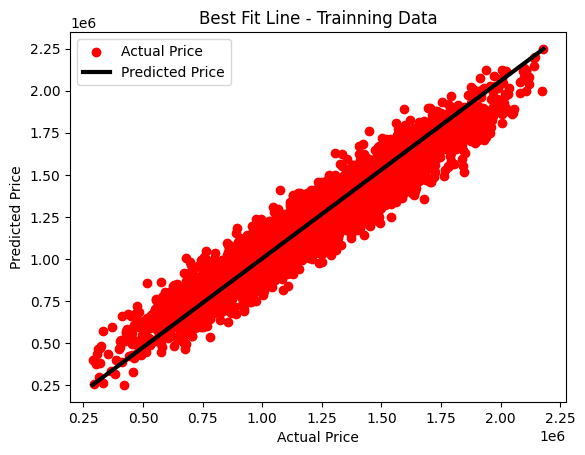

In [141]:
training_evaluation(Y_train, Y_pred_train)

In [144]:
def test_evaluation(actual,predicted):
    

    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    r2 = r2_score(actual,predicted)

    print(f' MSE     :  {mse}')
    print(f' RMSE     :  {rmse}')
    print(f' MAE     :  {mae}')
    print(f' R2_Score     :  {r2}')

    plt.scatter(actual,predicted,color='g',label='Actual Price')
    plt.plot([actual.min(),actual.max()],[predicted.min(),predicted.max()],color='k',lw=3,label='Predicted Price')
    plt.title('Best Fit Line - Trainning Data')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.legend()
    plt.show()

 MSE     :  10295321310.103657
 RMSE     :  101465.86278203945
 MAE     :  81137.45704323056
 R2_Score     :  0.9126986629591395


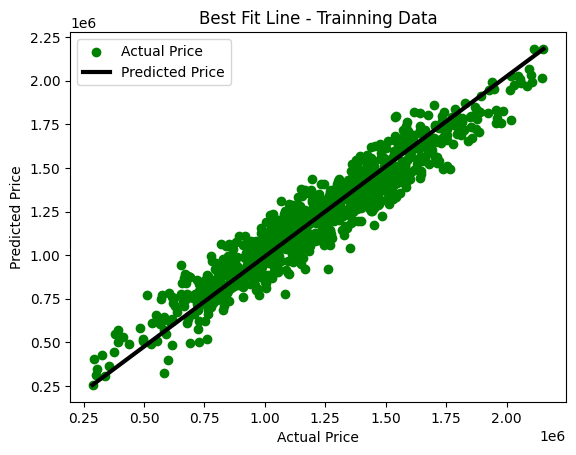

In [145]:
test_evaluation(Y_test, Y_pred_test)